In [145]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [179]:
df = pd.read_csv("datasets/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Описание датасета
| Название колонки       | Описание                                                                 | Тип данных   |
|---------------------------|-------------------------------------------------------------------------|--------------|
| **Car_ID**                | Уникальный идентификатор наблюдения                                     | Integer      |
| **Symboling**             | Рейтинг страхового риска (-3 безопасный, +3 рискованный)                | Categorical  |
| **CarName**               | Название машины                                                         | Categorical  |
| **fueltype**              | Тип топлива (газ/дизель)                                                | Categorical  |
| **aspiration**            | Тип впуска (турбо/стандартный)                                          | Categorical  |
| **doornumber**            | Количество дверей                                                       | Categorical  |
| **carbody**               | Тип кузова                                                              | Categorical  |
| **drivewheel**            | Тип привода (передний/задний/полный)                                    | Categorical  |
| **enginelocation**        | Расположение двигателя (переднее/заднее)                                | Categorical  |
| **wheelbase**             | Колесная база (длина между центрами колес)                              | Numeric      |
| **carlength**             | Длина автомобиля                                                        | Numeric      |
| **carwidth**              | Ширина автомобиля                                                       | Numeric      |
| **carheight**             | Высота автомобиля                                                       | Numeric      |
| **curbweight**            | Вес автомобиля без пассажиров и груза                                   | Numeric      |
| **enginetype**            | Тип двигателя                                                           | Categorical  |
| **cylindernumber**        | Количество цилиндров                                                    | Categorical  |
| **enginesize**            | Объем двигателя                                                         | Numeric      |
| **fuelsystem**            | Система подачи топлива                                                  | Categorical  |
| **boreratio**             | Соотношение диаметра цилиндра к ходу поршня                             | Numeric      |
| **stroke**                | Ход поршня                                                              | Numeric      |
| **compressionratio**      | Степень сжатия                                                          | Numeric      |
| **horsepower**            | Мощность двигателя (л.с.)                                               | Numeric      |
| **peakrpm**               | Максимальное количество оборотов в минуту                               | Numeric      |
| **citympg**               | Расход топлива в городе (миль на галлон)                                | Numeric      |
| **highwaympg**            | Расход топлива на трассе (миль на галлон)                               | Numeric      |
| **price**                 | Цена автомобиля (целевая переменная)                                    | Numeric      |

# Предобработка

In [180]:
df.duplicated().sum()

0

In [181]:
target = df.price
df.drop(['car_ID', 'CarName', 'price'], axis=1, inplace=True)

In [182]:
df.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [183]:
df.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
dtype: int64

In [184]:
categ = [
    'symboling',
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'drivewheel',
    'enginelocation',
    'enginetype',
    'cylindernumber',
    'fuelsystem'
]

In [185]:
cont = [col for col in df.columns if col not in categ]

In [186]:
cont

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [187]:
categ_dummies = [
    'fueltype',
    'aspiration',
    'doornumber',
    'enginelocation',
    'carbody',
    'drivewheel',
    'enginetype',
    'fuelsystem'
]

In [188]:
df.symboling.unique() # no need in lable encoder

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [189]:
df.cylindernumber.unique() 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [190]:
df = pd.get_dummies(df, columns=categ_dummies, drop_first=True)

In [191]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,...,False,True,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [192]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.cylindernumber = le.fit_transform(df.cylindernumber)

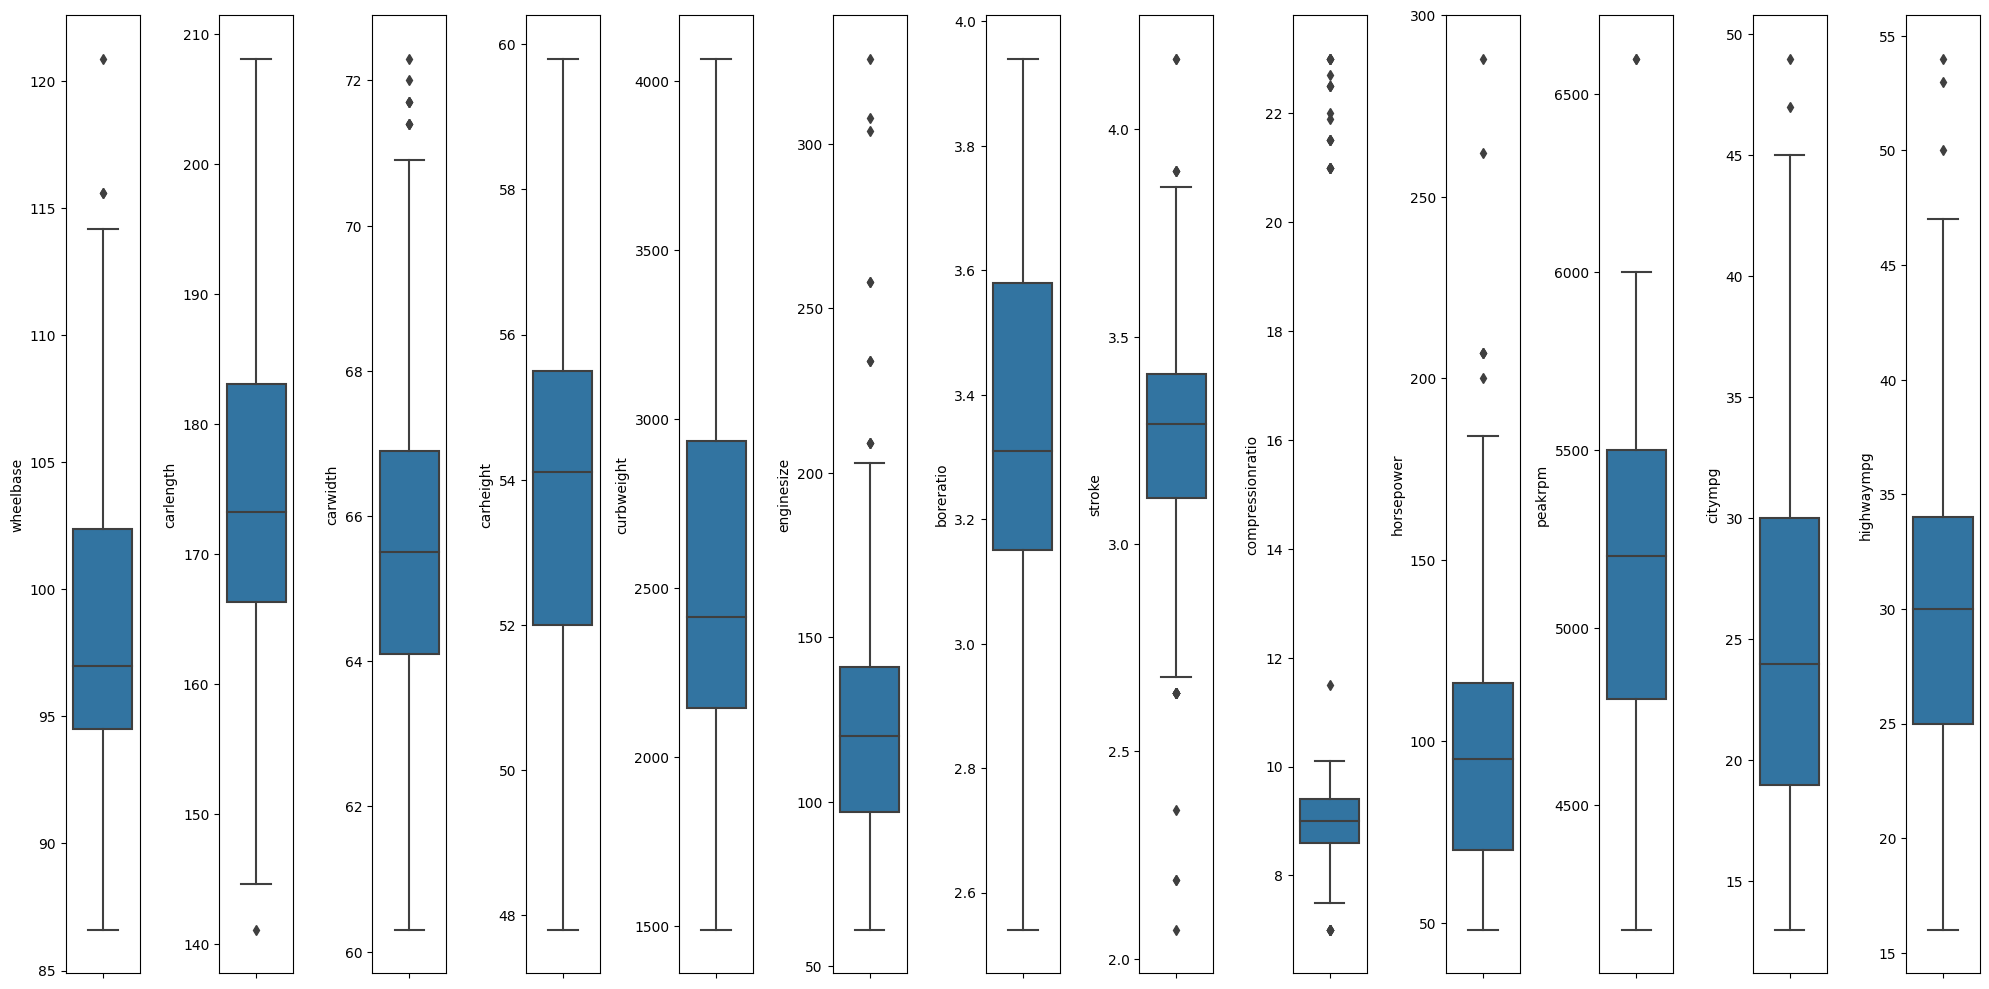

In [193]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [194]:
from sklearn.preprocessing import QuantileTransformer

In [195]:
qt = QuantileTransformer(n_quantiles=10, random_state=0) 
df[cont] = qt.fit_transform(df[cont])

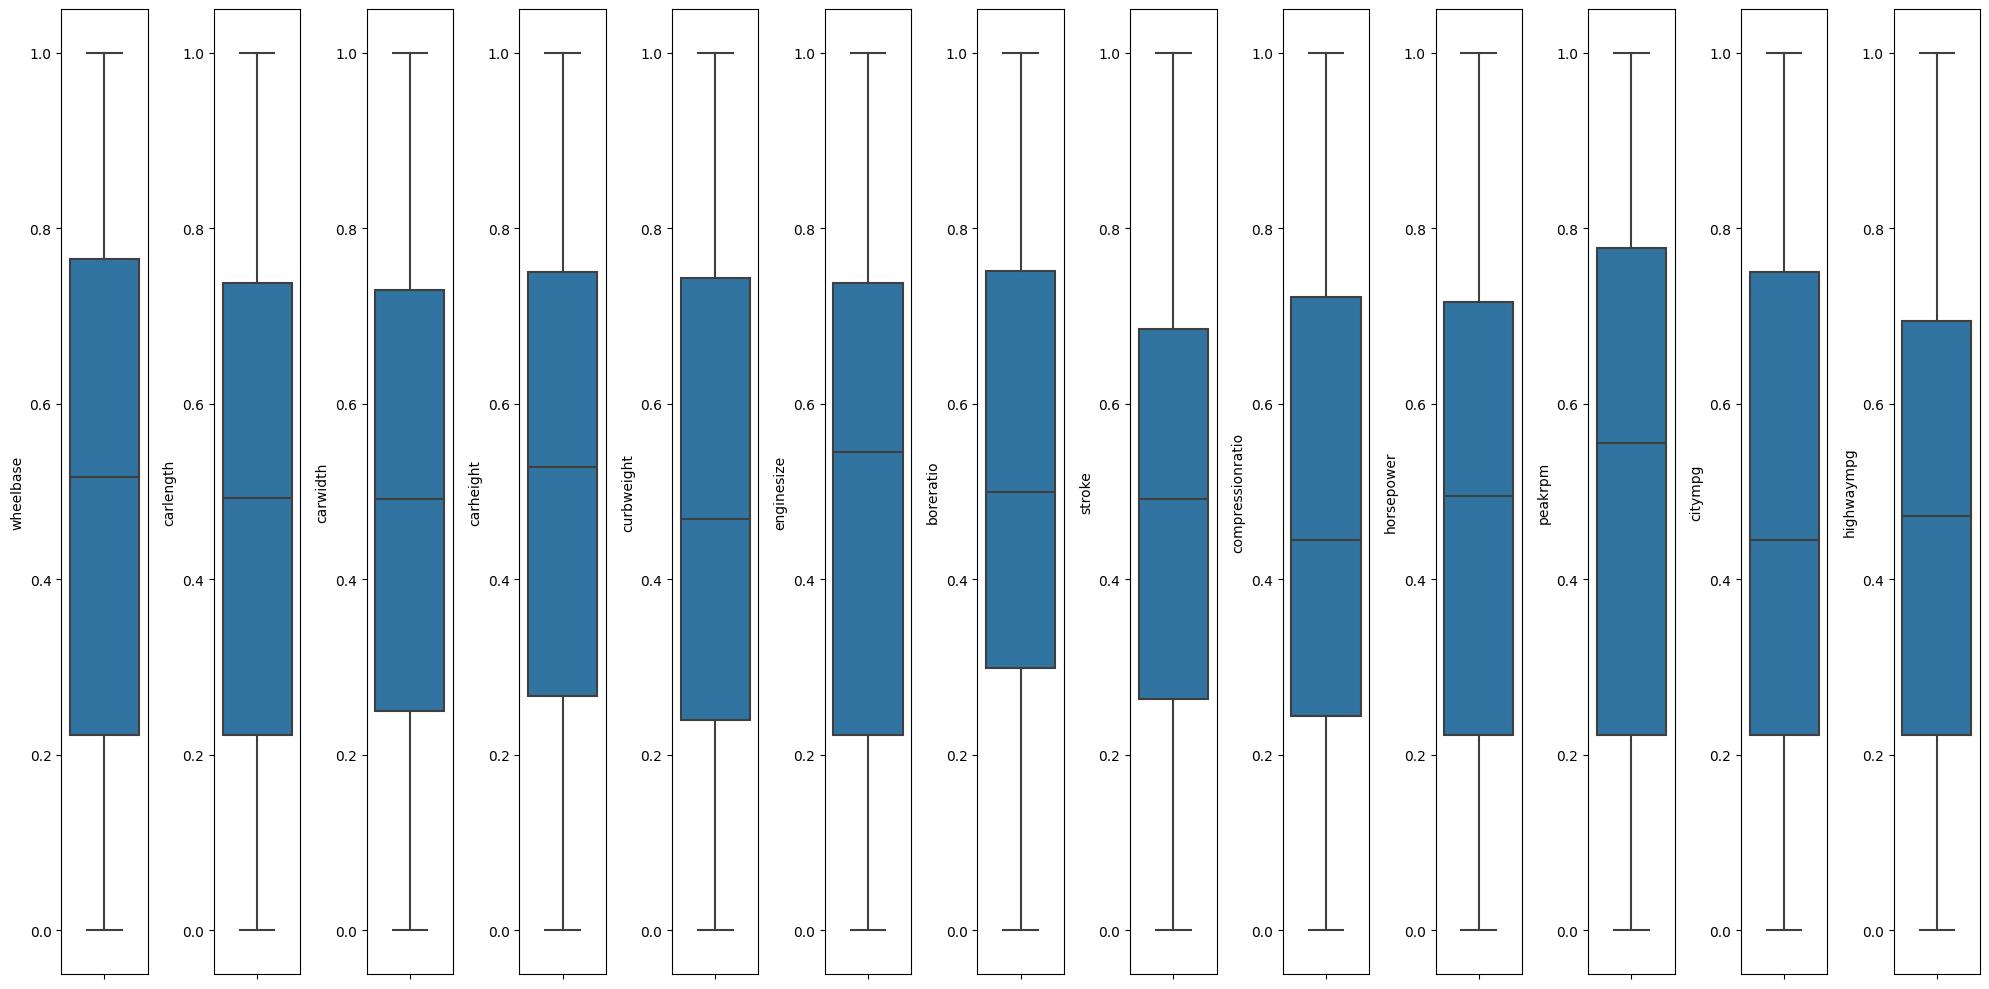

In [196]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

<Axes: >

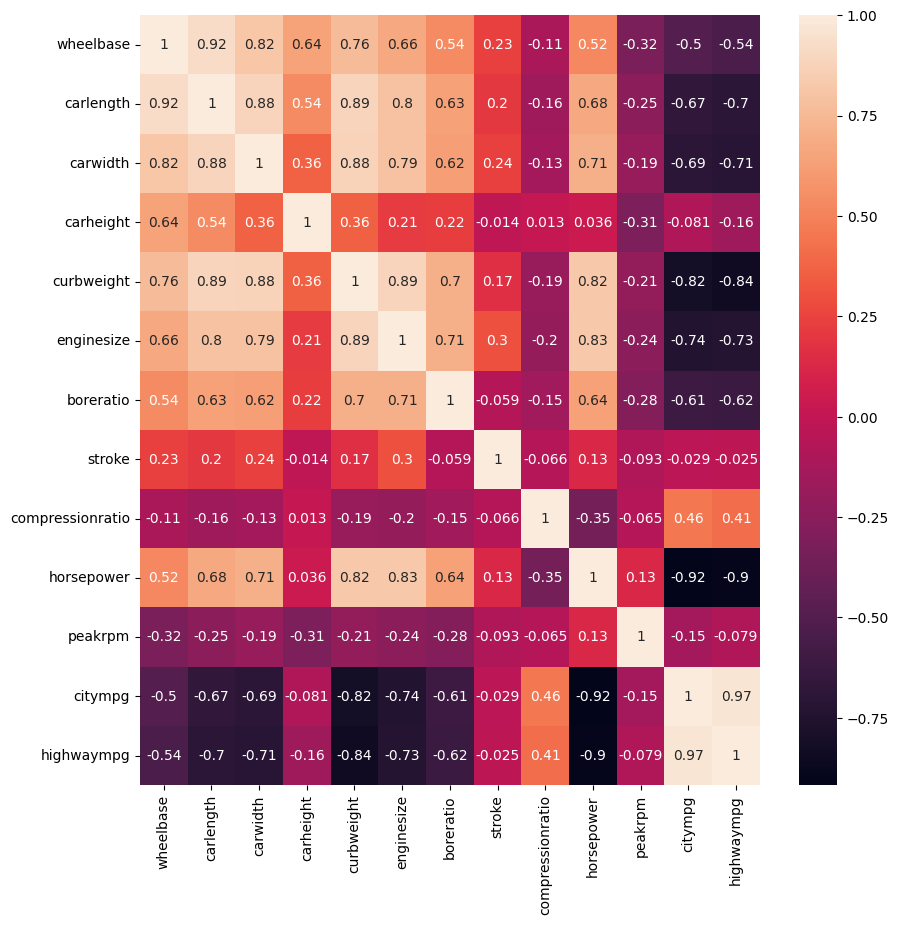

In [197]:
corr = df[cont].corr()
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr,  annot=True, ax=ax)

In [198]:
df.drop(['carlength', 'wheelbase', 'carwidth', 'citympg', 'compressionratio'], axis=1, inplace=True)

In [199]:
new_cont = [col for col in cont if col not in ['carlength', 'wheelbase', 'carwidth', 'citympg', 'compressionratio']]

<Axes: >

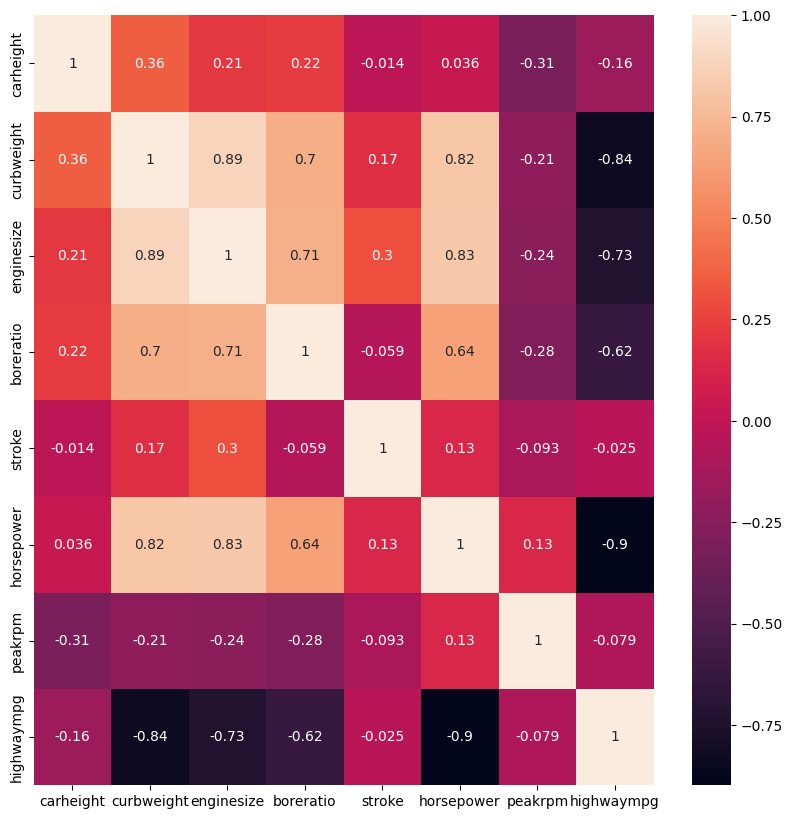

In [200]:
corr = df[new_cont].corr()
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr,  annot=True, ax=ax)

C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Распределение цены')

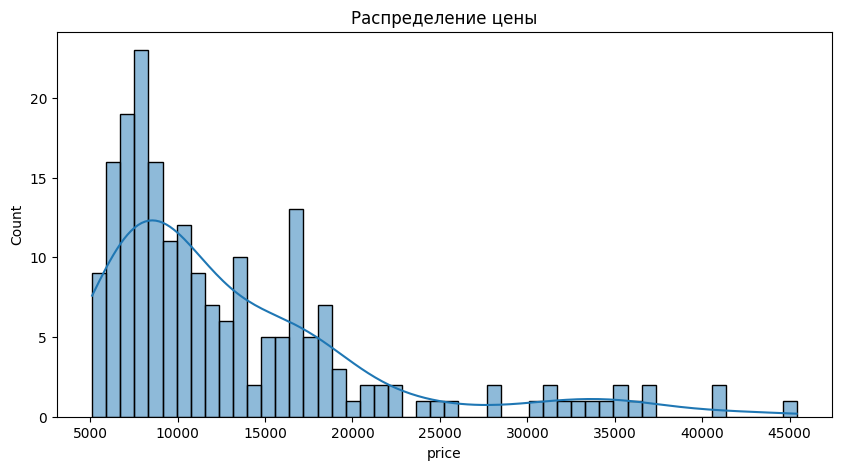

In [201]:
plt.figure(figsize=(10, 5))
sns.histplot(target, bins=50, kde=True)
plt.title('Распределение цены')

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Линейная регрессия с регуляризацией L2

In [205]:
from sklearn import linear_model

In [206]:
alphas = np.logspace(0, 2, 50)  # 50 значений в логарифмической шкале от1 до 100
reg_ridge = linear_model.RidgeCV(alphas=alphas, cv=10)

In [207]:
reg_ridge = linear_model.RidgeCV()

In [208]:
reg_ridge.fit(X_train, y_train);

In [209]:
reg_ridge.score(X_test, y_test)

0.6814000723786834

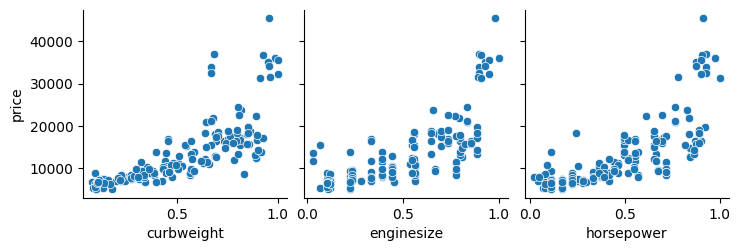

In [210]:
# выбираем фичи с наибольшией корреляцией с таргетом, чтобы отобразить на графике
top_features = correlations.index[:3]
sns.pairplot(data=pd.concat([X_train[top_features], y_train], axis=1), 
             y_vars=['price'], 
             x_vars=top_features)

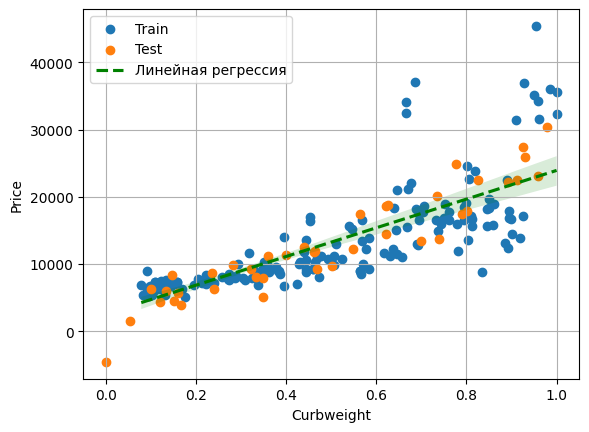

In [211]:
plt.scatter(X_train.curbweight, y_train, label='Train')
plt.scatter(X_test.curbweight, reg_ridge.predict(X_test), label='Test')
sns.regplot(x=X_train['curbweight'], 
            y=y_train, 
            scatter=False, 
            color='green', 
            line_kws={'linestyle': '--'},
            label='Линейная регрессия')
plt.xlabel('Curbweight')
plt.ylabel('Price')
plt.grid()
plt.legend()

In [212]:
reg_ridge.alpha_

1.0

In [213]:
reg_ridge.coef_

array([ -145.5924717 ,   465.1440047 ,  9884.81520545, -1341.15969674,
        2970.26562636, -1151.90790563, -1856.04309009,  4004.80508002,
        1168.63980638, -5335.42779404, -1372.63280503,  -688.21977642,
         207.62278568,  9691.75985463,  1220.89789193, -1798.33827092,
        -285.23167658, -3385.89133276,  1541.06115429,  3752.82889983,
        3375.79422824, -4153.67817475,  -130.1074792 ,   274.65980763,
        2923.44753627,  2631.54898456,   284.21001904,   440.32237752,
        1372.63280503, -1340.99149472,  -750.21322463, -2369.3737259 ,
       -2411.33975519])

In [95]:
np.mean(target)

13276.710570731706

In [39]:
reg_ridge.intercept_

11370.676253674848

Вывод: Некоторые признаки могут быть избыточными или нерелевантными, но модель пытается их использовать, что приводит к большим коэффициентам. 

# Линейная регрессия с регуляризацией L1

In [219]:
reg_lasso = linear_model.LassoCV(alphas=alphas, cv=10)

In [220]:
reg_lasso.fit(X_train,y_train);
reg_lasso.score(X_test,y_test)

0.6847671727852566

In [221]:
reg_lasso.coef_

array([   -0.        ,     0.        , 14318.04383673, -1002.06094637,
           0.        ,    -0.        ,    -0.        ,   848.51020274,
         211.224917  , -3142.63624953,    -0.        ,    -0.        ,
           0.        , 12736.94821793,     0.        , -1311.03477421,
           0.        , -3220.84433712,     0.        ,  2704.21464266,
           0.        , -4226.43896721,  -195.82372287,    -0.        ,
        3015.98533585,     0.        ,    -0.        ,     0.        ,
           0.        ,    -0.        ,     0.        ,  -971.79390483,
          -0.        ])

In [222]:
sum(lasso.coef_ != 0)

13

In [223]:
ind = np.array(range(33))
nnzero = ind[np.abs(reg_lasso.coef_) != 0]

In [224]:
df.columns[nnzero]

Index(['curbweight', 'cylindernumber', 'horsepower', 'peakrpm', 'highwaympg',
       'enginelocation_rear', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv',
       'fuelsystem_spdi'],
      dtype='object')

In [225]:
reg_ridge.intercept_

11370.676253674848

Вывод: Кол-во ненулевых коэффициентов ниже кол-ва всех коэффицентов, действительно, много нерелевантных столбцов

# Линейная регрессия ElasticNet

In [230]:
l1_ratio = np.linspace(1e-2, 1, 20)

In [231]:
reg_elasticnet = linear_model.ElasticNetCV(cv=10,
                                           alphas=alphas,
                                           l1_ratio=l1_ratio,
                                           max_iter=10000,
                                           random_state=42)

In [232]:
reg_elasticnet.fit(X_train,y_train);

In [233]:
reg_elasticnet.score(X_test,y_test)

0.6847671727852566

In [234]:
reg_elasticnet.alpha_

56.89866029018296

In [235]:
reg_elasticnet.l1_ratio_

1.0

Вывод: Так ка l1_ratio=1.0, то эластикнет перешел в лассо регресию. То есть м
Модель автоматическ (обнуляет коэффициенты неважных переменнх Подтверждается, чтотно, присутствуют избыточные или слабовлияющие признаки, котодолжны быть исключеныю Большое значение альфа говорит о том, что есть очень большой штраф за сложность модели. Это может привести к недообучению и к о
Обнулению коэффициентов даже для некоторых важных признаков.чил.

# Ядерная регрессия

In [55]:
from sklearn import kernel_ridge

In [239]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = kernel_ridge.KernelRidge(kernel=kernel, alpha=alphas)
    model.fit(X_train, y_train)
    print(f"{kernel}: {model.score(X_test, y_test):.3f}")

linear: 0.680
poly: 0.720
rbf: 0.628


In [244]:
for degree in range(2, 15):
    model = kernel_ridge.KernelRidge(kernel='poly', degree=degree, alpha=0.1)
    model.fit(X_train, y_train)
    print(f"poly (degree={degree}): {model.score(X_test, y_test):.3f}")

poly (degree=2): 0.788
poly (degree=3): 0.836
poly (degree=4): 0.850
poly (degree=5): 0.853
poly (degree=6): 0.852
poly (degree=7): 0.853
poly (degree=8): 0.855
poly (degree=9): 0.858
poly (degree=10): 0.858
poly (degree=11): 0.855
poly (degree=12): 0.852
poly (degree=13): 0.854
poly (degree=14): 0.857


Вывод: Возможно, данные имеют нелинейную зависимость, которую полиномиальное преобразование успешно улавливает.

# Нейронная сеть (MLP)

In [251]:
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [365]:
reg_mlp = neural_network.MLPRegressor(random_state=42,
                                      hidden_layer_sizes=(64,),
                                      alpha=0.001,
                                      max_iter=1000,
                                      batch_size=32,
                                      early_stopping=True
                                      )

In [366]:
reg_mlp.fit(X_train,y_train);
reg_mlp.score(X_test,y_test)

0.1124947082097133

In [258]:
import warnings
param_grid = {
    'hidden_layer_sizes': [(64,), (128, 64), (128, 64, 32)],
    'alpha': np.logspace(-4, -1, 5),
    'learning_rate_init': np.linspace(0.001, 0.1, 5)
}

warnings.filterwarnings("ignore")
mlp = MLPRegressor(max_iter=1000, early_stopping=True)
grid = GridSearchCV(mlp, param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший R²:", grid.best_score_)

Лучшие параметры: {'alpha': 0.0031622776601683794, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.1}
Лучший R²: 0.6748896502485775


In [436]:
reg_mlp = neural_network.MLPRegressor(random_state=42,
                                      hidden_layer_sizes=(128, 64),
                                      alpha=0.003,
                                      max_iter=1000,
                                      batch_size=32,
                                      early_stopping=True,
                                      learning_rate_init=0.1
                                      )

In [437]:
reg_mlp.fit(X_train,y_train);
reg_mlp.score(X_test,y_test)

0.8399592284095796

In [438]:
reg_mlp.score(X_train,y_train)

0.9390313083200067

Вывод: Как можно заметить, наступило переобучение. Также из-за ограниченного кол-ва комбинаций гиперпарамтров модель могла не попасть в оптимальные значения

# KNN

In [259]:
from sklearn import neighbors

In [288]:
scores = []
n_max = 10
for i in range(1, n_max + 1):
  reg_knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='uniform', p=2)
  reg_knn.fit(X_train,y_train);
  scores.append(reg_knn.score(X_test,y_test))

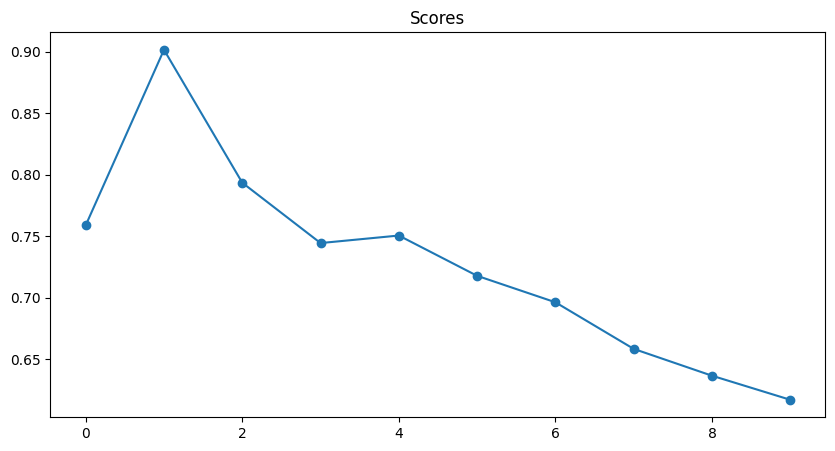

In [289]:
plt.figure(figsize=(10, 5))
plt.plot(scores,'-o')
plt.title('Scores')
plt.show()

In [290]:
reg_knn = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform', p=2)

In [291]:
reg_knn.fit(X_train,y_train);
reg_knn.score(X_test,y_test)

0.901627427963608

In [292]:
reg_knn.score(X_train, y_train)

0.9085606493265808

Вывод: В данных могут существовать четкие локальные зависимости